# Playing with Feature Importance

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gpd
import h3
from shapely import wkt
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV, LassoCV, Lasso, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
import pydeck as pdk
import seaborn as sns
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
df10 = pd.read_csv('model10.csv')

In [27]:
hexagons = []
h6 = df10['h6'].unique()
for i in h6:
    d=df10.loc[df10.h6==i, :]
    if d.shape[0]>=2000:
        hexagons.append(i)
X = df10.iloc[:,6:]
# running lassos to save coefficients
importance = pd.DataFrame({'feature': X.columns})
good = df10.loc[df10['h6'].isin(hexagons), :]
for i in good['h6'].unique():
    d=df10.loc[df10.h6==i, :]
    X = d.iloc[:,6:]
    y = d[['alerts']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
    lasso = LassoLarsIC(criterion='aic', normalize=True).fit(X_train, y_train)
    importance[str(i)] = abs(lasso.coef_)
    
x = importance.columns[1:]
l = []
for i in x:
    l.append(i)

importance = importance.sort_values(by=l, ascending=False)
importance.iloc[:10,:]

,feature,861e0b237ffffff,861e0b2a7ffffff,861e0b387ffffff,861e0b38fffffff,861e0b397ffffff,861e0b39fffffff,861e0b3afffffff
11,dayofweek,6.007474e-02,0.016004,0.002646,0.011901,0.000000e+00,0.016212,0.009778
14,IsHoliday,5.289203e-02,0.000000,0.000000,0.146099,0.000000e+00,0.264622,0.000000
131,dayofweek IsHoliday,2.926160e-02,0.000000,0.006826,0.027178,0.000000e+00,0.000000,0.000000
129,dayofweek month,1.654674e-03,0.000000,0.000344,0.000000,1.695091e-03,0.000000,0.000000
692,dayofweek month IsHoliday,1.359379e-03,0.000000,0.006597,0.001388,1.493451e-02,0.000000,0.000000
326,precip dayofweek HomeGame,6.370262e-04,0.000000,0.000000,0.000122,6.502365e-04,0.000074,0.000000
525,stringency^2 dayofweek HomeGame,4.803307e-06,0.000000,0.000000,0.000000,0.000000e+00,0.000002,0.000005
0,precip,1.923297e-06,0.000000,0.000008,0.000000,0.000000e+00,0.000000,0.000000
77,stringency^2 month,1.362926e-06,0.000000,0.000000,0.000019,0.000000e+00,0.000000,0.000000
19,stringency stringency^3,4.715925e-09,0.000000,0.000000,0.000000,2.341602e-10,0.000000,0.000000


In [28]:
imp = importance.melt('feature', var_name='hex', value_name='importance')
sort = imp.sort_values(by = 'importance', ascending=False)
grouped = sort.groupby('hex', as_index=False).nth(list(np.arange(10)))
grouped

,feature,hex,importance
2141,schools,861e0b38fffffff,4.266331e-01
2104,hospitals,861e0b38fffffff,3.973096e-01
2105,schools^2,861e0b38fffffff,3.590785e-01
3531,schools,861e0b39fffffff,3.285530e-01
3476,IsHoliday,861e0b39fffffff,2.646224e-01
...,...,...,...
713,stringency stringency^2 stringency^3,861e0b2a7ffffff,5.580333e-13
794,precip stringency^3 schools^3,861e0b2a7ffffff,0.000000e+00
810,stringency^3 month HomeGame,861e0b2a7ffffff,0.000000e+00
809,stringency^3 dayofweek IsHoliday,861e0b2a7ffffff,0.000000e+00


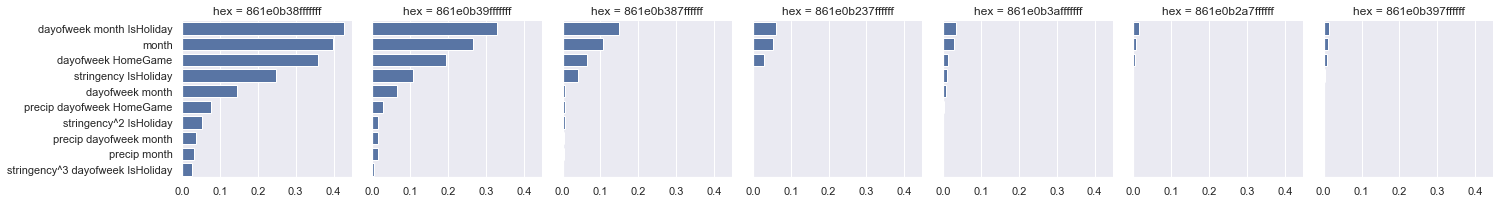

In [31]:
sns.set(rc = {'figure.figsize':(15,10)})
g = sns.FacetGrid(grouped, col='hex')
g.map_dataframe(sns.barplot, x="importance", y="feature");